# База данных венчурных фондов и инвестиций в компании-стартапы

В проекте курса по SQL вы будете работать с базой данных, которая хранит информацию о венчурных фондах и инвестициях в компании-стартапы. Эта база данных основана на датасете Startup Investments, опубликованном на популярной платформе для соревнований по исследованию данных Kaggle.  
  
**Цель:** проанализировать данные о фондах и инвестициях и написать запросы к базе. 
  
ER-диаграмма:  
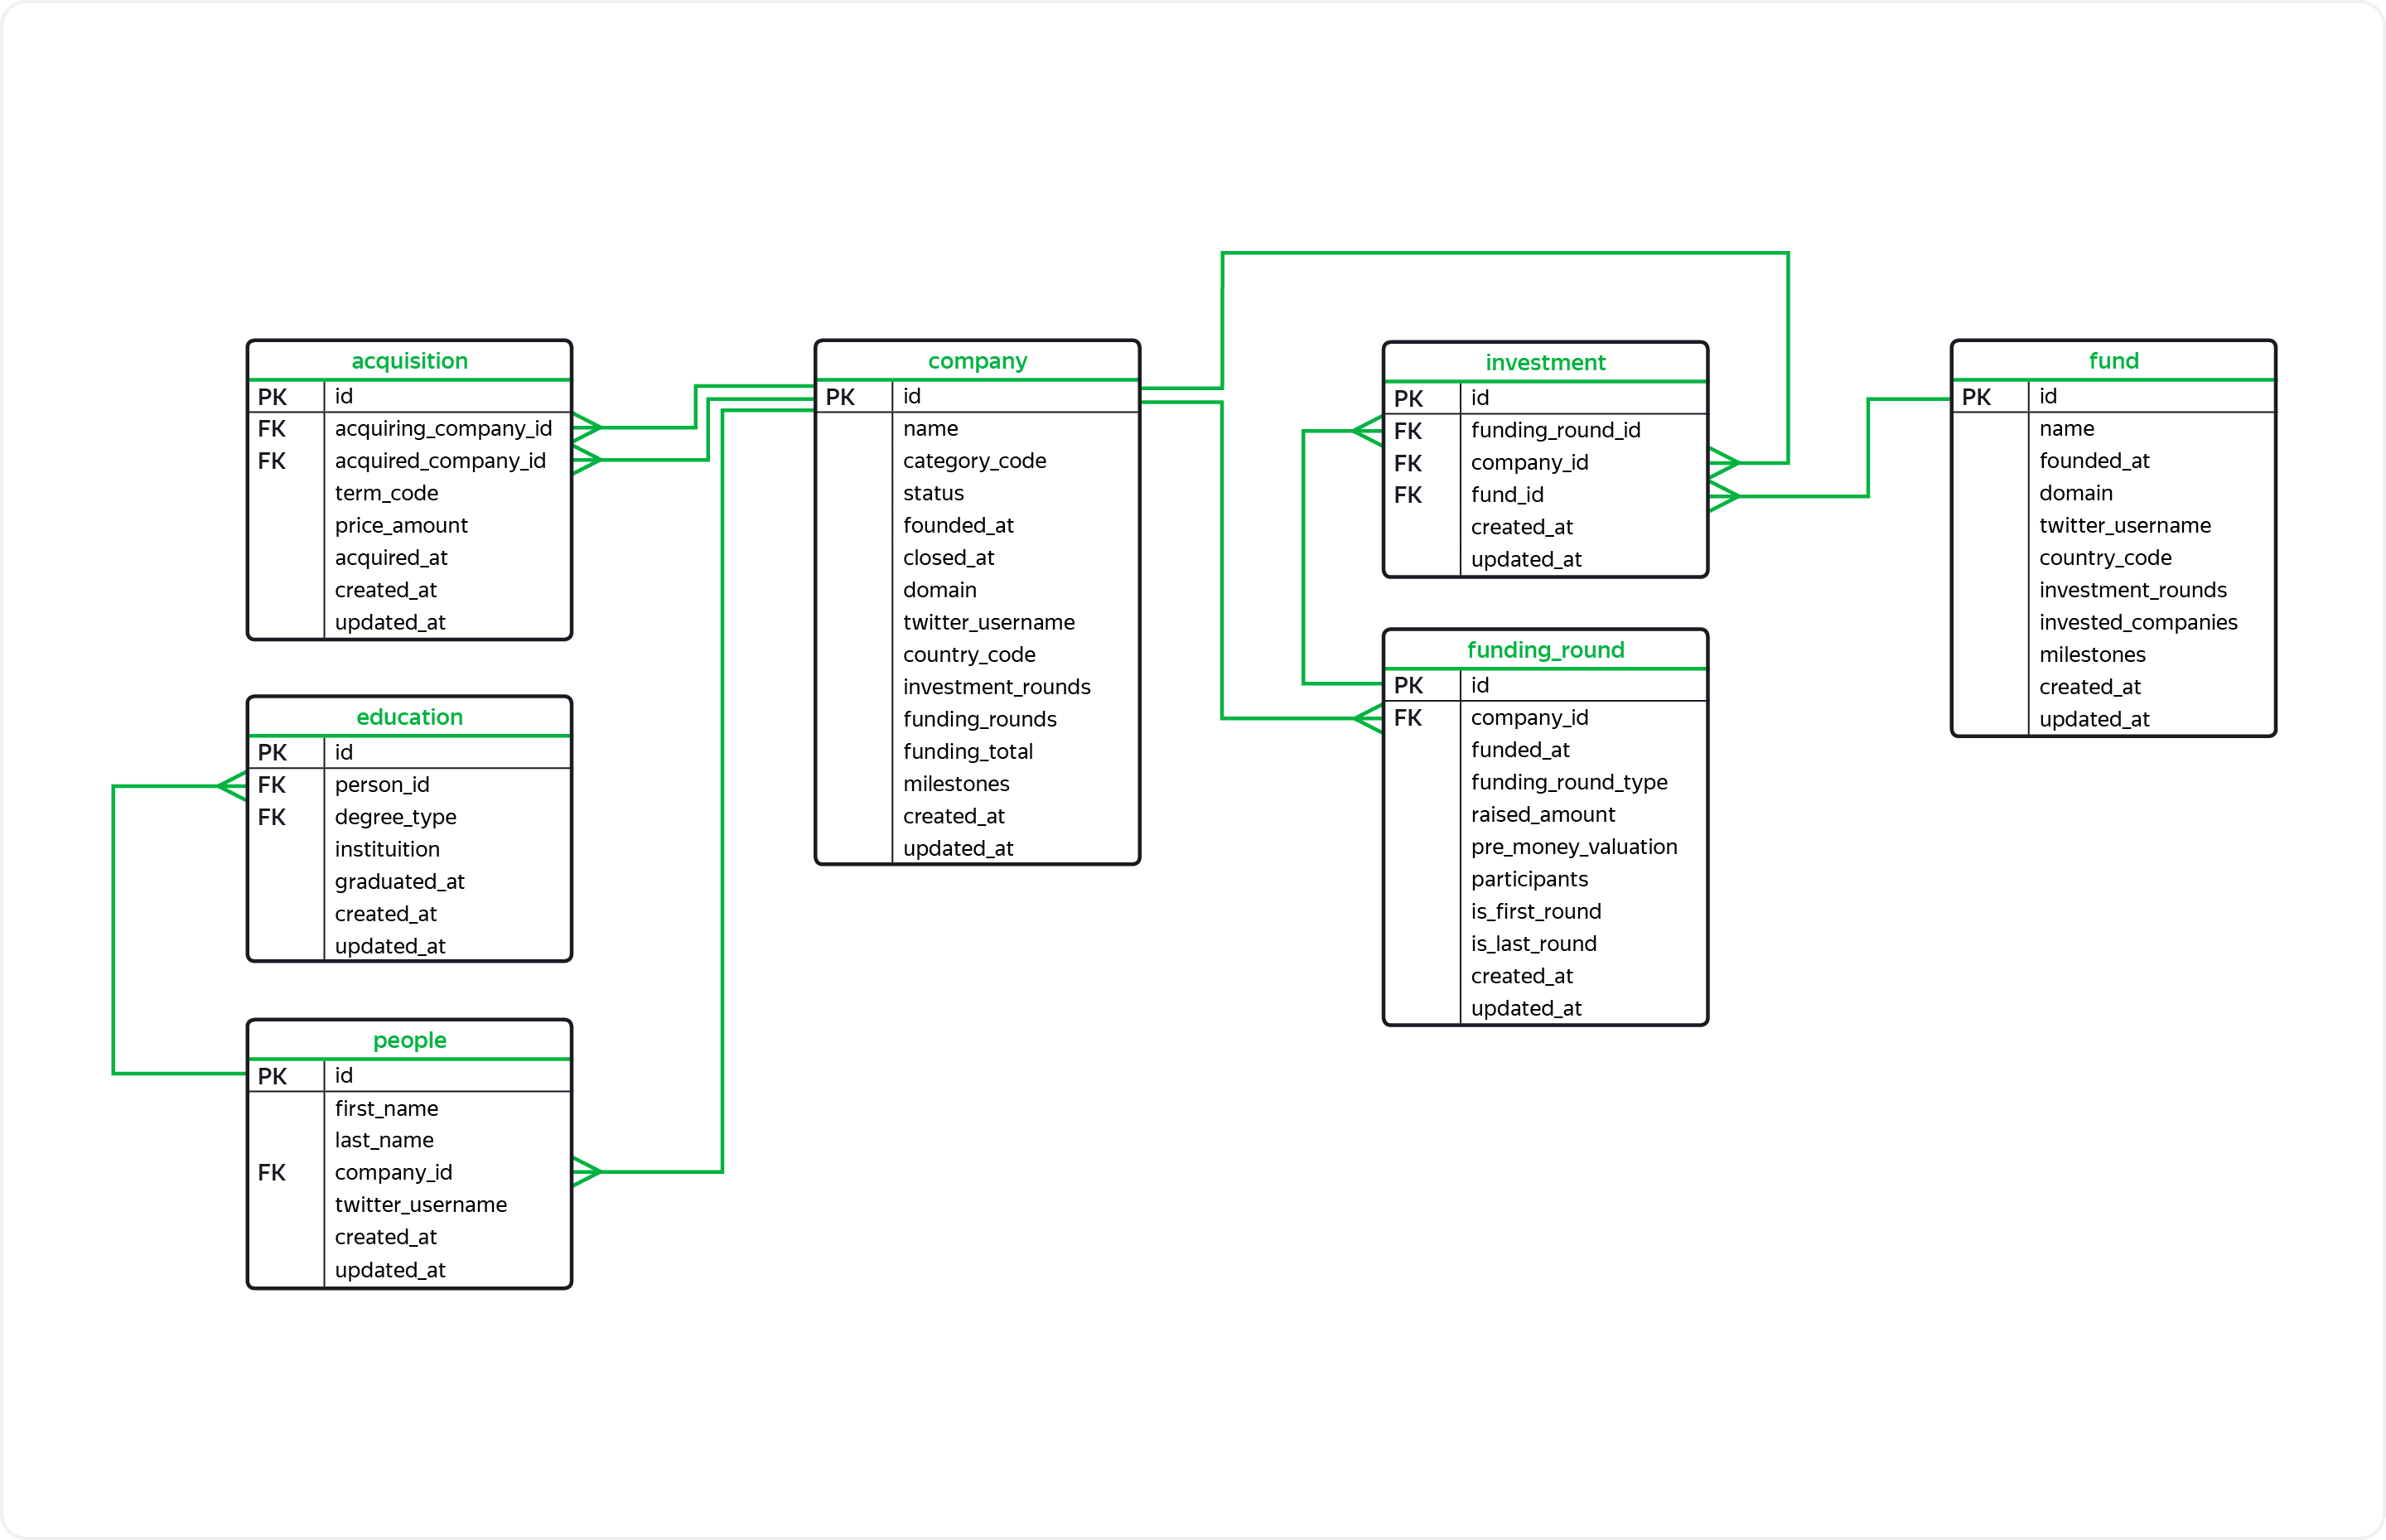

Данные, которые хранят таблицы:  



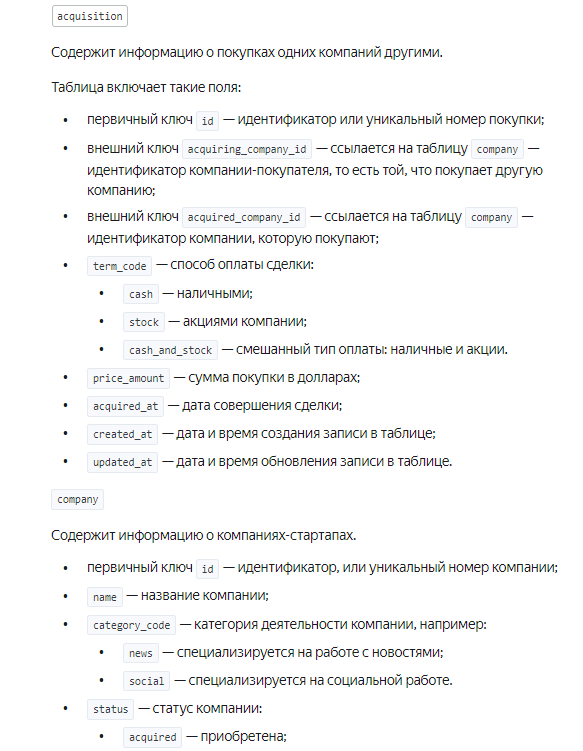
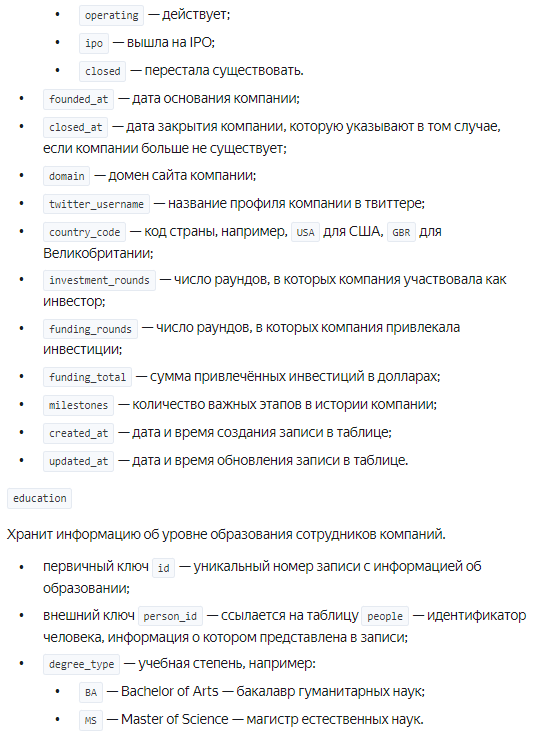
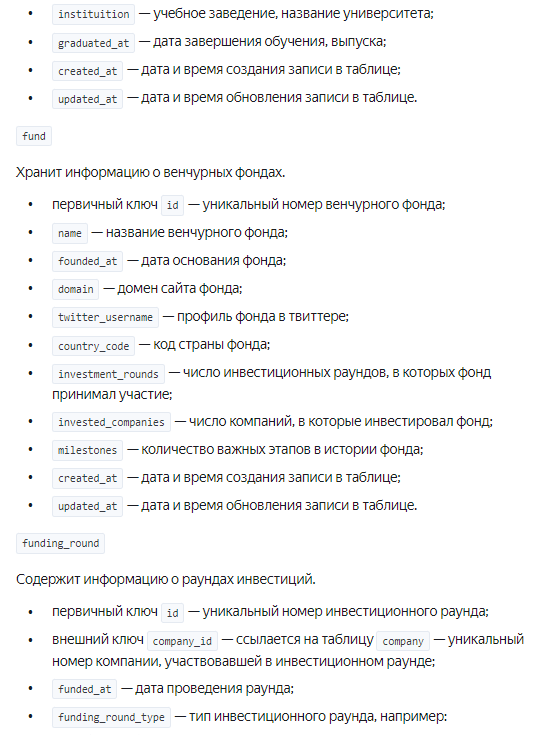
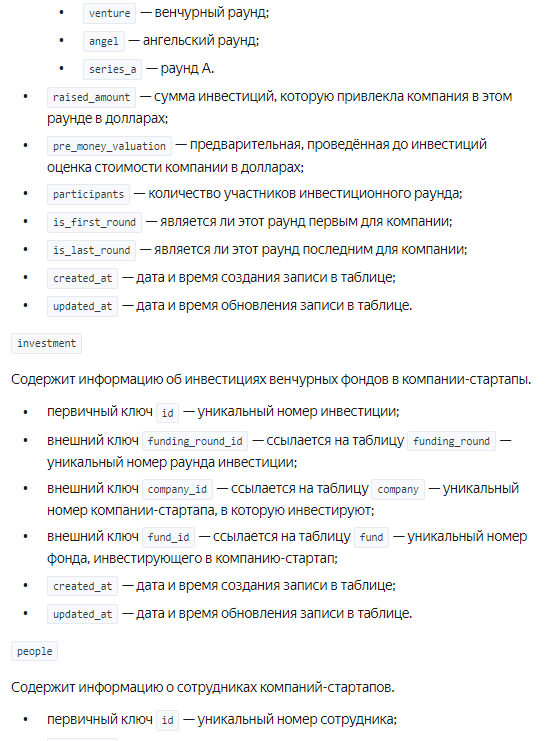
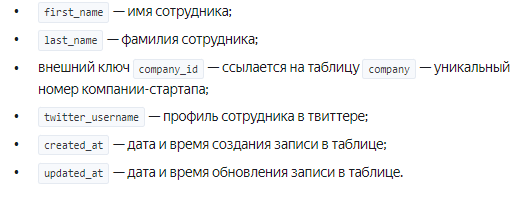

#### Задача 1.   
  
Посчитайте, сколько компаний закрылось.

In [ ]:
SELECT  COUNT (*) 
FROM  company 
WHERE  status = 'closed';



***
Вывод:  
2584

#### Задача 2.   
  
Отобразите количество привлечённых средств для новостных компаний США. Отсортируйте таблицу по убыванию значений в поле funding_total.

In [ ]:
SELECT funding_total
FROM company
WHERE category_code = 'news'
  AND country_code = 'USA'
ORDER BY funding_total DESC;

***  
Вывод:
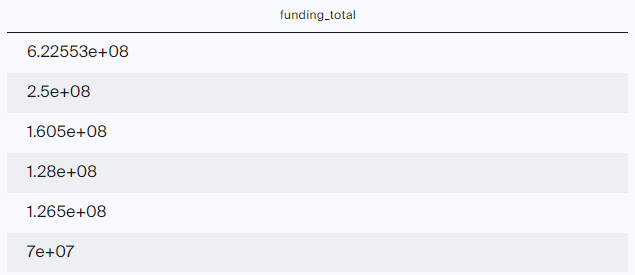  
...

#### Задача 3.   
  
Найдите общую сумму сделок по покупке одних компаний другими в долларах. Отберите сделки, которые осуществлялись только за наличные с 2011 по 2013 год включительно.

In [ ]:
SELECT SUM (price_amount)
FROM acquisition
WHERE term_code = 'cash'
  AND EXTRACT (YEAR
               FROM CAST (acquired_at AS date)) BETWEEN '2011' AND '2013';

***  
Вывод:
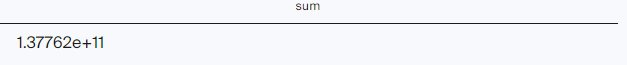

#### Задача 4.   
  
Отобразите имя, фамилию и названия аккаунтов людей в твиттере, у которых названия аккаунтов начинаются на 'Silver'.

In [ ]:
SELECT first_name,
       last_name,
       twitter_username 
FROM people
WHERE twitter_username LIKE 'Silver%';

***  
Вывод:
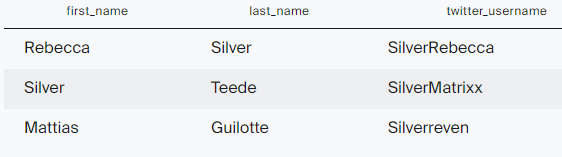

#### Задача 5.   
  
Выведите на экран всю информацию о людях, у которых названия аккаунтов в твиттере содержат подстроку 'money', а фамилия начинается на 'K'.

In [ ]:
SELECT *
FROM people
WHERE twitter_username LIKE '%money%'
 AND last_name LIKE 'K%';

***  
Вывод:
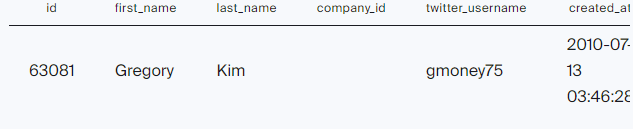

#### Задача 6.   
  
Для каждой страны отобразите общую сумму привлечённых инвестиций, которые получили компании, зарегистрированные в этой стране. Страну, в которой зарегистрирована компания, можно определить по коду страны. Отсортируйте данные по убыванию суммы.

In [ ]:
SELECT country_code,
       SUM(funding_total)
FROM company
GROUP BY country_code
ORDER BY SUM(funding_total) DESC;

***  
Вывод:
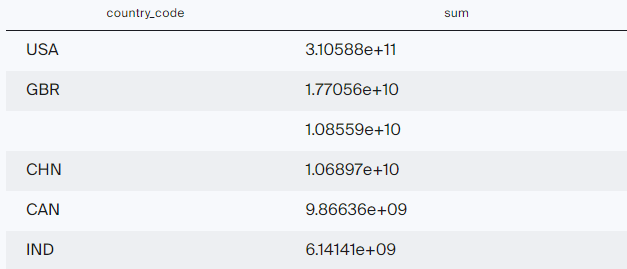
...

#### Задача 7.   
  
Составьте таблицу, в которую войдёт дата проведения раунда, а также минимальное и максимальное значения суммы инвестиций, привлечённых в эту дату.  
Оставьте в итоговой таблице только те записи, в которых минимальное значение суммы инвестиций не равно нулю и не равно максимальному значению.

In [ ]:
SELECT funded_at, 
       MIN (raised_amount) as min_raised_amount,
       MAX (raised_amount) as max_raised_amount
FROM funding_round
GROUP BY funded_at
HAVING MIN(raised_amount) <> MAX(raised_amount) 
  AND MIN(raised_amount) <> 0;

***  
Вывод:
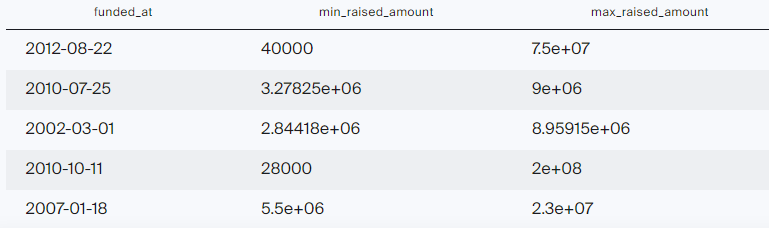
...

#### Задача 8.   
  
Создайте поле с категориями:  
- Для фондов, которые инвестируют в 100 и более компаний, назначьте категорию high_activity.
- Для фондов, которые инвестируют в 20 и более компаний до 100, назначьте категорию middle_activity.
- Если количество инвестируемых компаний фонда не достигает 20, назначьте категорию low_activity.  

Отобразите все поля таблицы fund и новое поле с категориями.

In [ ]:
SELECT *,
       CASE 
           WHEN invested_companies >= 100 THEN 'high_activity'
           WHEN invested_companies >= 20 AND invested_companies < 100 THEN 'middle_activity'
           WHEN invested_companies < 20 THEN 'low_activity'
       END
FROM fund 

***  
Вывод:
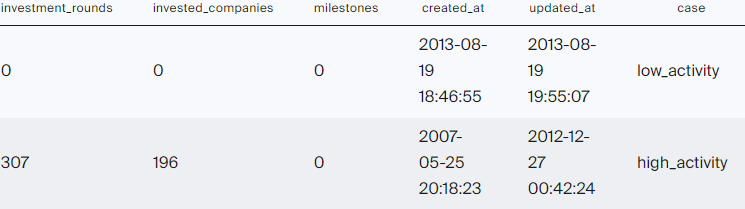
...

#### Задача 9.   
  
Для каждой из категорий, назначенных в предыдущем задании, посчитайте округлённое до ближайшего целого числа среднее количество инвестиционных раундов, в которых фонд принимал участие. Выведите на экран категории и среднее число инвестиционных раундов. Отсортируйте таблицу по возрастанию среднего.

In [ ]:
SELECT CASE
           WHEN invested_companies>=100 THEN 'high_activity'
           WHEN invested_companies>=20 THEN 'middle_activity'
           ELSE 'low_activity'
       END AS activity,
       ROUND(AVG(investment_rounds )) AS avg_investment_rounds 
FROM fund
GROUP BY activity
ORDER BY avg_investment_rounds;

***  
Вывод:
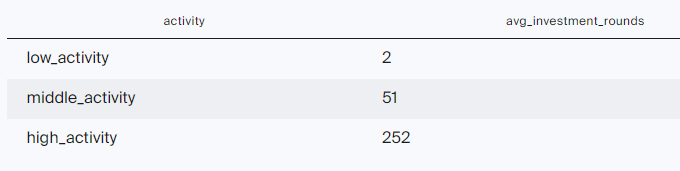
...

#### Задача 10.   
  
Выгрузите таблицу с десятью самыми активными инвестирующими странами. Активность страны определите по среднему количеству компаний, в которые инвестируют фонды этой страны.
Для каждой страны посчитайте минимальное, максимальное и среднее число компаний, в которые инвестировали фонды, основанные с 2010 по 2012 год включительно.
Исключите из таблицы страны с фондами, у которых минимальное число компаний, получивших инвестиции, равно нулю. Отсортируйте таблицу по среднему количеству компаний от большего к меньшему.

In [ ]:
SELECT country_code, 
       MIN (invested_companies) as min_invested_companies,
       MAX (invested_companies) as max_invested_companies,
       AVG (invested_companies) as avg_invested_companies
FROM fund
WHERE EXTRACT (year FROM CAST(founded_at AS date)) BETWEEN '2010' AND '2012'
GROUP BY country_code
HAVING MIN(invested_companies) <> 0
ORDER BY avg_invested_companies DESC
LIMIT 10;

***  
Вывод:
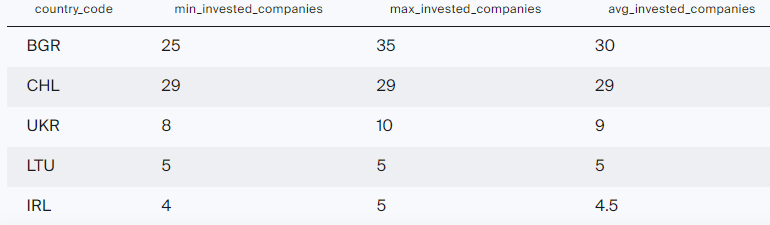
...

#### Задача 11.   
  
Отобразите имя и фамилию всех сотрудников стартапов. Добавьте поле с названием учебного заведения, которое окончил сотрудник, если эта информация известна.

In [ ]:
SELECT first_name,
       last_name,
	   instituition
FROM people AS p 
LEFT JOIN education AS e ON p.id = e.person_id;

***  
Вывод:
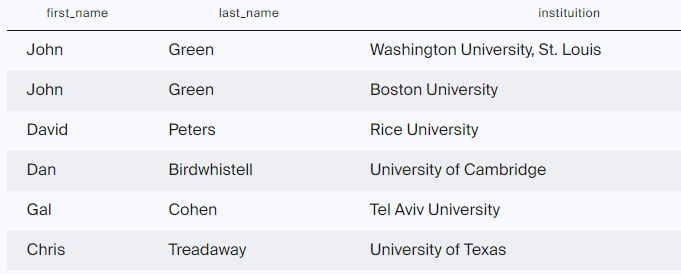
...

#### Задача 12.   
  
Для каждой компании найдите количество учебных заведений, которые окончили её сотрудники. Выведите название компании и число уникальных названий учебных заведений. Составьте топ-5 компаний по количеству университетов.

In [ ]:
SELECT c.name,
       COUNT(DISTINCT e.instituition) AS number_instituitions
FROM company AS c
JOIN people AS p ON c.id=p.company_id
JOIN education AS e ON p.id=e.person_id
GROUP BY c.name
ORDER BY number_instituitions DESC
LIMIT 5;

***  
Вывод:
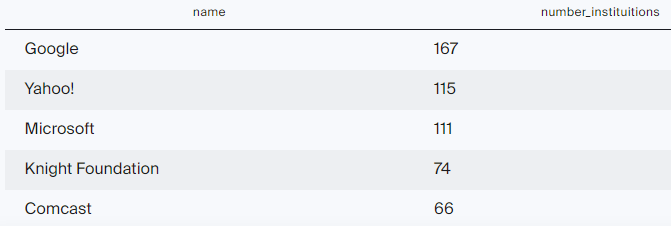
...

#### Задача 13.   
  
Составьте список с уникальными названиями закрытых компаний, для которых первый раунд финансирования оказался последним.

In [ ]:
SELECT DISTINCT c.name
FROM company AS c
JOIN funding_round AS fr ON c.id=fr.company_id
WHERE c.status = 'closed'
  AND fr.is_first_round = 1
  AND fr.is_last_round = 1;

***  
Вывод:
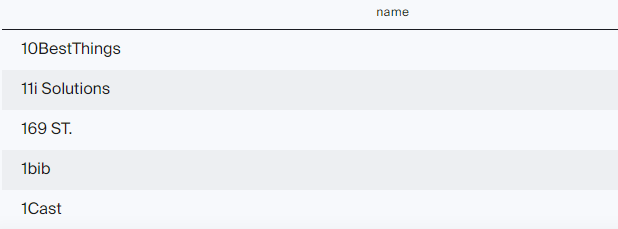
...

#### Задача 14.   
  
Составьте список уникальных номеров сотрудников, которые работают в компаниях, отобранных в предыдущем задании.

In [ ]:
SELECT p.id
FROM people as p
LEFT JOIN company AS c ON p.company_id = c.id
WHERE c.id IN (SELECT DISTINCT c.id
      FROM company AS c
      JOIN funding_round AS fr ON c.id=fr.company_id
      WHERE c.status = 'closed'
      AND fr.is_first_round = 1
      AND fr.is_last_round = 1);

***  
Вывод:  
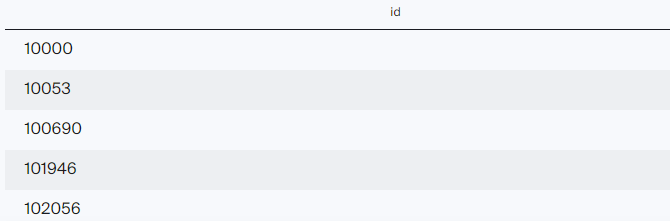
...

#### Задача 15.   
  
Составьте таблицу, куда войдут уникальные пары с номерами сотрудников из предыдущей задачи и учебным заведением, которое окончил сотрудник.

In [ ]:
WITH pi AS 
  (SELECT p.id
   FROM people as p
   LEFT JOIN company AS c ON p.company_id = c.id
   WHERE c.id IN (SELECT DISTINCT c.id
                  FROM company AS c
                  JOIN funding_round AS fr ON c.id=fr.company_id
                  WHERE c.status = 'closed'
                  AND fr.is_first_round = 1
                  AND fr.is_last_round = 1))

SELECT DISTINCT pi.id,
       e.instituition 
FROM pi
JOIN education AS e ON pi.id=e.person_id;

***  
Вывод:  
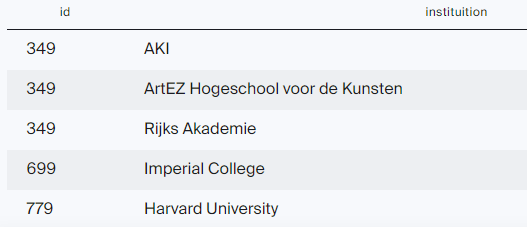
...

#### Задача 16.   
  
Посчитайте количество учебных заведений для каждого сотрудника из предыдущего задания.

In [ ]:
WITH pi AS
  (SELECT p.id
   FROM people as p
   LEFT JOIN company AS c ON p.company_id = c.id
   WHERE c.id IN (SELECT DISTINCT c.id
                  FROM company AS c
                  JOIN funding_round AS fr ON c.id=fr.company_id
                  WHERE c.status = 'closed'
                  AND fr.is_first_round = 1
                  AND fr.is_last_round = 1))

SELECT pi.id,
       COUNT(e.instituition) 
FROM pi
JOIN education AS e ON pi.id=e.person_id
GROUP BY pi.id;

***  
Вывод:  
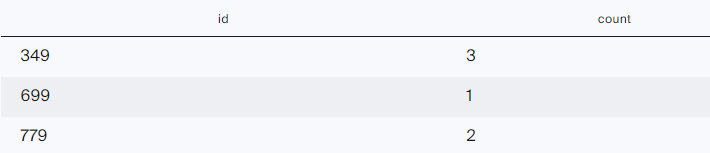
...

#### Задача 17.   
  
Выведите среднее число учебных заведений, которые окончили сотрудники разных компаний. Нужно вывести только одну запись, группировка здесь не понадобится.

In [ ]:
WITH pi AS
  (SELECT p.id
   FROM people as p
   LEFT JOIN company AS c ON p.company_id = c.id
   WHERE c.id IN (SELECT DISTINCT c.id
                  FROM company AS c
                  JOIN funding_round AS fr ON c.id=fr.company_id
                  WHERE c.status = 'closed'
                  AND fr.is_first_round = 1
                  AND fr.is_last_round = 1)),
      co AS
  (SELECT pi.id,
          COUNT(e.instituition) AS number_instituitions
   FROM pi
   JOIN education AS e ON pi.id=e.person_id
   GROUP BY pi.id)

SELECT AVG(number_instituitions)
FROM co;

***  
Вывод:  
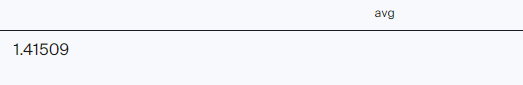
...

#### Задача 18.   
  
Выведите среднее число учебных заведений, которые окончили сотрудники компании Facebook.

In [ ]:
SELECT AVG(t.total)
FROM
  (SELECT p.id,
          COUNT(e.instituition) AS total
   FROM education AS e
   INNER JOIN people AS p ON e.person_id = p.id
   INNER JOIN company AS c ON p.company_id = c.id
   WHERE c.name = 'Facebook'
   GROUP BY p.id) AS t

***  
Вывод:  
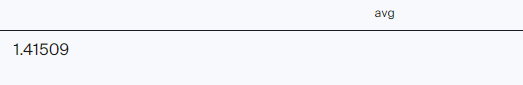
...

#### Задача 19.   
  
Составьте таблицу из полей:
- name_of_fund — название фонда;
- name_of_company — название компании;
- amount — сумма инвестиций, которую привлекла компания в раунде.  

В таблицу войдут данные о компаниях, в истории которых было больше шести важных этапов, а раунды финансирования проходили с 2012 по 2013 год включительно.

In [ ]:
SELECT f.name , c.name, fr.raised_amount
FROM funding_round fr 
JOIN investment AS i ON i.funding_round_id = fr.id 
JOIN company AS c ON c.id = i.company_id 
JOIN fund AS f on f.id = i.fund_id
WHERE EXTRACT(YEAR FROM fr.funded_at) BETWEEN 2012 AND 2013
  AND c.milestones > 6

***  
Вывод:  
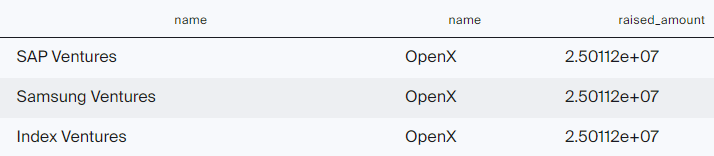
...

#### Задача 20.   
  
Выгрузите таблицу, в которой будут такие поля:
- название компании-покупателя;
- сумма сделки;
- название компании, которую купили;
- сумма инвестиций, вложенных в купленную компанию;
- доля, которая отображает, во сколько раз сумма покупки превысила сумму вложенных в компанию инвестиций, округлённая до ближайшего целого числа.  

Не учитывайте те сделки, в которых сумма покупки равна нулю. Если сумма инвестиций в компанию равна нулю, исключите такую компанию из таблицы.  
Отсортируйте таблицу по сумме сделки от большей к меньшей, а затем по названию купленной компании в алфавитном порядке.  
Ограничьте таблицу первыми десятью записями.

In [ ]:
SELECT c_1.name AS name_acquiring_company, 
       a.price_amount, 
       c_2.name AS name_acquired_company, 
       c_2.funding_total, 
       ROUND(a.price_amount / c_2.funding_total) AS ratio_price_amount
FROM acquisition AS a 
LEFT JOIN company AS c_1 ON a.acquiring_company_id = c_1.id
LEFT JOIN company AS c_2 ON a.acquired_company_id = c_2.id
WHERE a.price_amount <> 0
  AND c_2.funding_total <> 0
ORDER BY a.price_amount DESC,
         name_acquired_company
LIMIT 10;

***  
Вывод:  
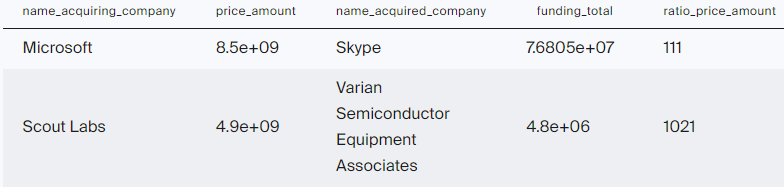
...

#### Задача 21.   
  
Выгрузите таблицу, в которую войдут названия компаний из категории social, получившие финансирование с 2010 по 2013 год. Выведите также номер месяца, в котором проходил раунд финансирования.

In [ ]:
SELECT c.name, 
       EXTRACT (month FROM funded_at) AS month
FROM company AS c 
LEFT JOIN funding_round AS fr ON c.id = fr.company_id
WHERE category_code = 'social'
  AND EXTRACT (year FROM funded_at) BETWEEN 2010 AND 2013;

***  
Вывод:  
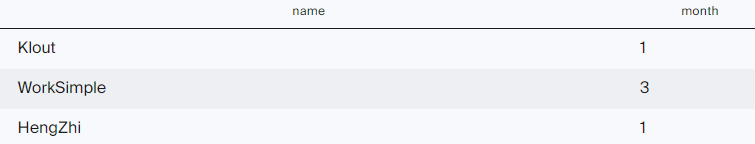
...

#### Задача 22.   
  
Отберите данные по месяцам с 2010 по 2013 год, когда проходили инвестиционные раунды. Сгруппируйте данные по номеру месяца и получите таблицу, в которой будут поля:
- номер месяца, в котором проходили раунды;
- количество уникальных названий фондов из США, которые инвестировали в этом месяце;
- количество компаний, купленных за этот месяц;
- общая сумма сделок по покупкам в этом месяце.

In [ ]:
WITH month_fund AS
  (SELECT EXTRACT(MONTH
                  FROM fr.funded_at) AS MONTH,
          COUNT(DISTINCT f.name) AS count_of_fund
   FROM funding_round AS fr
   LEFT JOIN investment AS i ON i.funding_round_id = fr.id
   LEFT JOIN fund AS f ON i.fund_id = f.id
   WHERE EXTRACT(YEAR
                 FROM fr.funded_at) BETWEEN 2010 AND 2013
     AND f.country_code = 'USA'
   GROUP BY MONTH),
     month_acquired AS
  (SELECT EXTRACT(MONTH
                  FROM acquired_at) AS MONTH,
          COUNT(acquired_company_id) AS count_of_acquired,
          SUM(price_amount) AS sum_of_acquired
   FROM acquisition
   WHERE EXTRACT(YEAR
                 FROM acquired_at) BETWEEN 2010 AND 2013
   GROUP BY MONTH)

SELECT month_fund.month,
       month_fund.count_of_fund,
       month_acquired.count_of_acquired,
       month_acquired.sum_of_acquired
FROM month_fund
JOIN month_acquired ON month_fund.month = month_acquired.month;

***  
Вывод:  
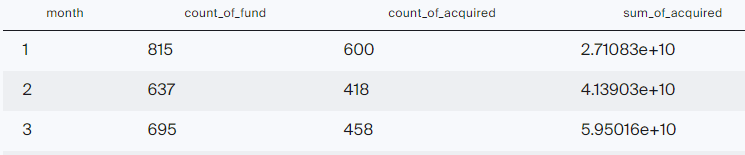
...

#### Задача 23.   
  
Составьте сводную таблицу и выведите среднюю сумму инвестиций для стран, в которых есть стартапы, зарегистрированные в 2011, 2012 и 2013 годах. Данные за каждый год должны быть в отдельном поле. Отсортируйте таблицу по среднему значению инвестиций за 2011 год от большего к меньшему.

In [ ]:
WITH
t2011 AS (SELECT country_code,
        AVG(funding_total) AS avg
        FROM company
        WHERE EXTRACT (YEAR FROM founded_at) = 2011
        GROUP BY country_code),
t2012 AS (SELECT country_code,
        AVG(funding_total) AS avg
        FROM company
        WHERE EXTRACT (YEAR FROM founded_at) = 2012
        GROUP BY country_code),
t2013 AS (SELECT country_code,
        AVG(funding_total) AS avg
        FROM company
        WHERE EXTRACT (YEAR FROM founded_at) = 2013
        GROUP BY country_code)

SELECT t2011.country_code,
       t2011.avg AS avg_2011,
       t2012.avg AS avg_2012,
       t2013.avg AS avg_2013
FROM t2011 JOIN t2012 ON t2011.country_code = t2012.country_code
JOIN t2013 ON t2013.country_code = t2012.country_code
ORDER BY avg_2011 DESC;

***  
Вывод:  
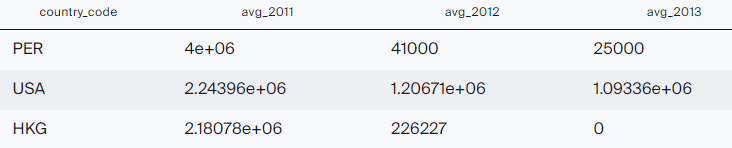
...